<a href="https://colab.research.google.com/github/chaos1231107/2023_2nd_simester/blob/%EC%A0%9C%EC%A1%B0%EC%82%AC%EC%9D%B4%EB%B2%84%EB%AC%BC%EB%A6%AC%EC%8B%9C%EC%8A%A4%ED%85%9C/video_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Now you can access files in your Google Drive
f = '/content/drive/My Drive/가천대/제사/runner.mp4'

# Perform operations with the file
# For example, print the file path



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install Ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.5 MB/s eta 0:00:00


In [12]:
from IPython.display import Video
Video(f, width=550)

In [14]:
#import the mp4 video
v = cv2.VideoCapture(f)
w = int(v.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(v.get(cv2.CAP_PROP_FRAME_HEIGHT))
v.release()
print('Dimensions:',w,h)

Dimensions: 1920 1080


In [17]:
img = []
v = cv2.VideoCapture(f)
while v.isOpened():
    success, image = v.read()
    if success:
        img.append(image)
    else:
        break
v.release()
print('Frames Read:', len(img))

Frames Read: 22


### convert BGR (OPEN cv) to RGB Format

In [18]:
for i, im in enumerate(img):
    img[i] = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

### Display First 9 Frames

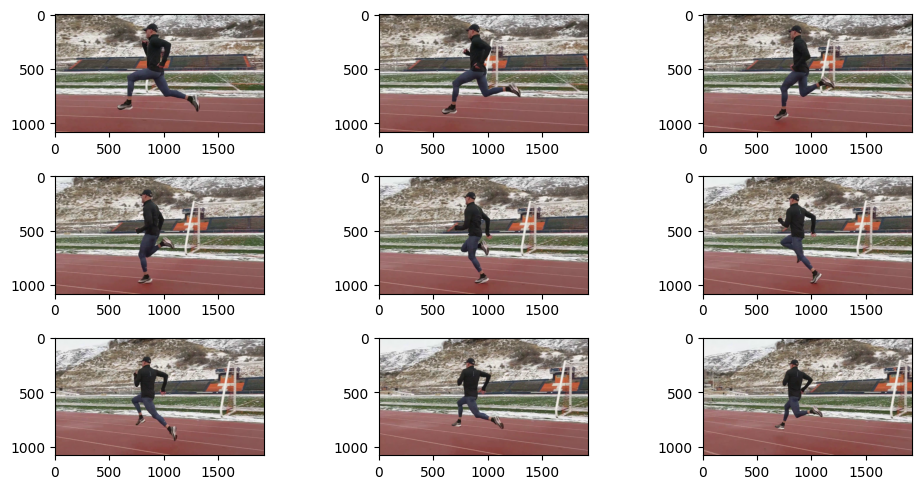

In [20]:
plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3,3,i+1); plt.imshow(img[i])
plt.tight_layout()

In [21]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 36.3 MB/s eta 0:00:00


In [22]:
import pandas as pd
import mediapipe as mp
mpds = mp.solutions.drawing_styles
mpdu = mp.solutions.drawing_utils
mpp = mp.solutions.pose

### Get Pose with Deep Learning (MediaPipe)

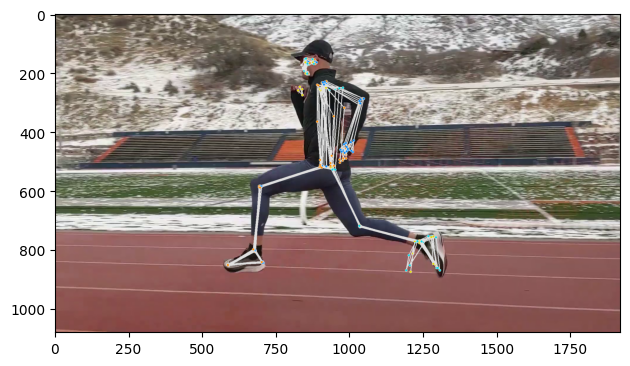

In [35]:
# 결과를 DataFrame에 저장
x = {
    'frame': [],
    'Lshldr_x': [], 'Lshldr_y': [], 'Lshldr_z': [], 'Lshldr_v': [],
    'Lhip_x': [], 'Lhip_y': [], 'Lhip_z': [], 'Lhip_v': [],
    'Lknee_x': [], 'Lknee_y': [], 'Lknee_z': [], 'Lknee_v': []
}
s = pd.DataFrame(x)

with mpp.Pose(
        min_detection_confidence=0.2,
        static_image_mode=False,
        model_complexity=2,
        smooth_landmarks=True,
        enable_segmentation=False,
        smooth_segmentation=False,
        min_tracking_confidence=0.2) as pose:
    for i, im in enumerate(img):
        im2 = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
        results = pose.process(im2)
        if not results.pose_landmarks:
            continue
        mpdu.draw_landmarks(
            im2, results.pose_landmarks,
            mpp.POSE_CONNECTIONS,
            landmark_drawing_spec=mpds.get_default_pose_landmarks_style())
        img[i] = im2

        # DataFrame에 값을 저장
        row = [i]
        for j, lm in enumerate(results.pose_landmarks.landmark):
            if j in [11, 23, 25]:
                row.extend([lm.x, lm.y, lm.z, lm.visibility])
        s.loc[i] = row
s.to_csv(f+'csv')
plt.imshow(img[0][:,:,[2,1,0]])
plt.tight_layout()


### Modify Frames : Add Text

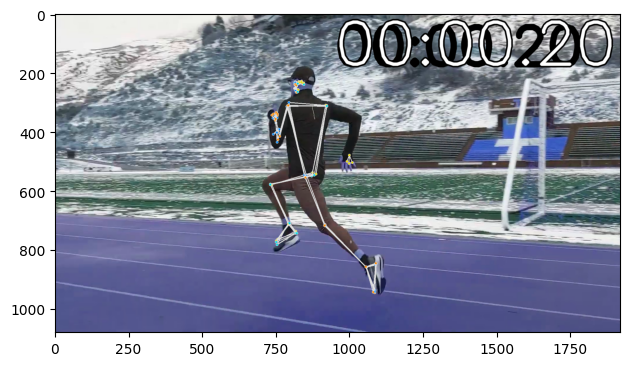

In [39]:
font = cv2.FONT_HERSHEY_SIMPLEX

for i, im in enumerate(img):
    tm = i / 30.0
    dm, ds = divmod(tm, 60)
    str_time = '{0:02d}:{1:05.2f}'.format(int(dm), ds)

    black = (0, 0, 0)
    white = (255, 255, 255)

    # 수정된 부분: 글꼴 두께를 정수형으로 전달
    cv2.putText(im, str_time, (950, 170), font, 6.8, black, 20, cv2.LINE_AA)
    cv2.putText(im, str_time, (950, 170), font, 6.8, white, 10, cv2.LINE_AA)
plt.imshow(img[6][:,:,[2,1,0]])
plt.tight_layout()

In [40]:
scale = 0.5
for i, im in enumerate(img):
    img[i] = cv2.resize(im, None, fx=scale, fy=scale)

### Get New Frame Size

In [41]:
h,w,c = img[0].shape
print('New Dimensions: ',h,w)

New Dimensions:  540 960


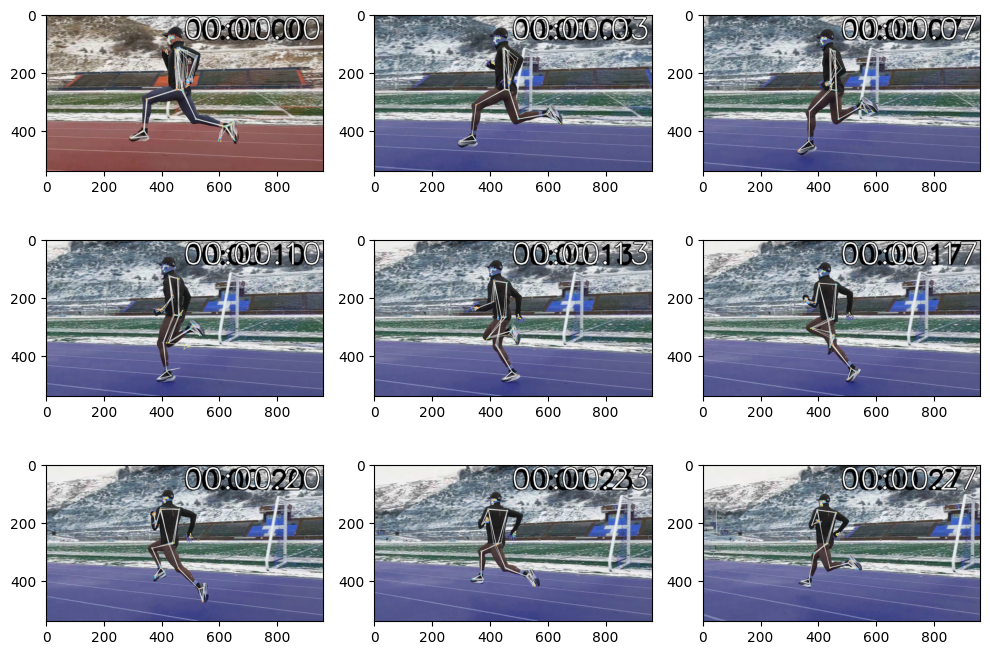

In [43]:
plt.figure(figsize=(10,7))
for i in range(9):
    plt.subplot(3,3,i+1); plt.imshow(img[i][:,:,[2,1,0]])
plt.tight_layout()

In [44]:
fnew = f[:-4] + '.webm'
out = cv2.VideoWriter(fnew,\
                      cv2.VideoWriter_fourcc(*'vp80'),5,(w,h))
for im in img:
    out.write(im)
out.release()

### export video file

In [45]:
Video(fnew, width=550)

In [46]:
p = pd.read_csv(f+'csv')
p.head()

,Unnamed: 0,frame,Lshldr_x,Lshldr_y,Lshldr_z,Lshldr_v,Lhip_x,Lhip_y,Lhip_z,Lhip_v,Lknee_x,Lknee_y,Lknee_z,Lknee_v
0,0,0.0,0.465443,0.224495,-0.151315,0.999952,0.471341,0.483004,-0.083743,0.999994,0.362460,0.546055,-0.017632,0.997646
1,1,1.0,0.465310,0.222018,-0.149572,0.999956,0.469821,0.482804,-0.099890,0.999995,0.368206,0.576878,-0.077955,0.997588
2,2,2.0,0.455855,0.222069,-0.143614,0.999960,0.460266,0.484099,-0.097142,0.999995,0.383253,0.616311,-0.058861,0.997498
3,3,3.0,0.445108,0.238378,-0.115332,0.999961,0.461219,0.484674,-0.096107,0.999994,0.421760,0.657819,-0.068140,0.994695
4,4,4.0,0.434057,0.270014,-0.127668,0.999963,0.459056,0.501465,-0.095260,0.999993,0.436971,0.673270,-0.093705,0.994581


In [49]:
p['Ls2Lh'] = np.sqrt(
    (p['Lshldr_x'] - p['Lhip_x']) ** 2
    + (p['Lshldr_y'] - p['Lhip_y']) ** 2
    + (p['Lshldr_z'] - p['Lhip_z']) ** 2
)
p.head()

,Unnamed: 0,frame,Lshldr_x,Lshldr_y,Lshldr_z,Lshldr_v,Lhip_x,Lhip_y,Lhip_z,Lhip_v,Lknee_x,Lknee_y,Lknee_z,Lknee_v,Ls2Lh
0,0,0.0,0.465443,0.224495,-0.151315,0.999952,0.471341,0.483004,-0.083743,0.999994,0.362460,0.546055,-0.017632,0.997646,0.267260
1,1,1.0,0.465310,0.222018,-0.149572,0.999956,0.469821,0.482804,-0.099890,0.999995,0.368206,0.576878,-0.077955,0.997588,0.265515
2,2,2.0,0.455855,0.222069,-0.143614,0.999960,0.460266,0.484099,-0.097142,0.999995,0.383253,0.616311,-0.058861,0.997498,0.266156
3,3,3.0,0.445108,0.238378,-0.115332,0.999961,0.461219,0.484674,-0.096107,0.999994,0.421760,0.657819,-0.068140,0.994695,0.247570
4,4,4.0,0.434057,0.270014,-0.127668,0.999963,0.459056,0.501465,-0.095260,0.999993,0.436971,0.673270,-0.093705,0.994581,0.235042


In [50]:
p['Dist'] = 1.0 / (p['Ls2Lh'])

tm = 1.0 / 30.0

In [52]:
# 'Vel' 열 초기화
p['Vel'] = 0

for i in range(1, len(p)):
    vi = (p['Dist'].iloc[i] - p['Dist'].iloc[i - 1]) / tm
    if i == 1:
        p['Vel'].iloc[i] = vi
    else:
        alpha = 0.1
        p['Vel'].iloc[i] = vi * alpha + p['Vel'].iloc[i - 1] * (1 - alpha)

# 첫 번째 값은 다른 값으로 계산하거나 원하는 값으로 설정
p['Vel'].iloc[0] = p['Vel'].iloc[1]


<ipython-input-52-d7acec6b8600>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p['Vel'].iloc[i] = vi


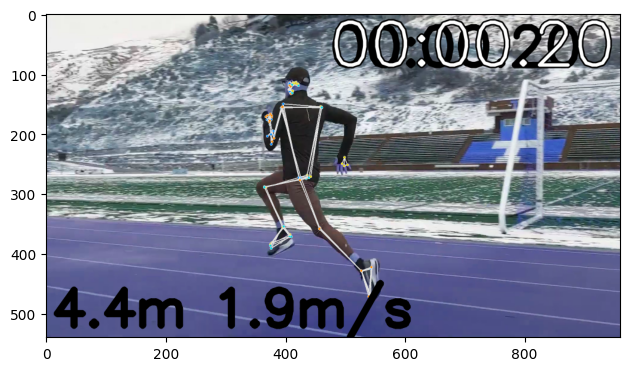

In [56]:
for i, im in enumerate(img):
    str_txt = f"{np.round(p['Dist'].iloc[i],1)}m " + \
                f"{np.round(p['Vel'].iloc[i],1)}m/s"
    cv2.putText(im,str_txt, (10,520),\
                font, 2.8, black,10, cv2.LINE_AA)
    cv2.putText(im,str_txt, (10,520),\
                font, 2.8, black,5, cv2.LINE_AA)
plt.imshow(img[6][:,:,[2,1,0]])
plt.tight_layout()

In [57]:
fnew = f[:-4] + '_xtra.webm'
out = cv2.VideoWriter(fnew,\
                      cv2.VideoWriter_fourcc(*'vp80'),5,(w,h))

for im in img:
    out.write(im)
out.release()

Video(fnew, width=550)